# Algoritmi di ordinamento

*(Sezione 12.1 - 12.6 del libro di testo)*

Un altro classico problema in informatica è l'ordinamento (tant'è che in francese il computer si chiama *ordinateur*, ovvero *colui che ordina*). Il problema dell'ordinamento consiste, data una lista `l` qualunque, nel permutare gli elementi di `l` (generalmente *sul posto*) in maniera tale da ordinarla dall'elemento più piccolo al più grande (o viceversa).

Python mette a disposizione il metodo `sort` per le liste che fa esattamente quello.

In [1]:
l = [ 12, 44, 1, -4, 0]
l.sort()
l

[-4, 0, 1, 12, 44]

Esistono tanti algoritmi di ordinamento, alcuni con complessità $O(n^2)$, altri con complessità $O(n \log n)$, dove $n$ è la lunghezza della lista da ordinare. Ne elenchiamo alcuni:

* Complessità $O(n^2)$:
    * selection sort
    * bubble sort
    * insertion sort
* Complessità $O(n \log n)$:
    * merge sort
    * quick sort
    * heap sort

Sebbene quelli di complessità $O(n \log n)$ siano più efficienti, quello con complessità $O(n^2)$ hanno comunque una notevole valenza didattica e possono essere più convenienti in situazioni specifiche. Noi vedremo un algoritmo per ognuna delle due categorie: il selection sort e il merge sort.

## Ordinamento per selezione (selection sort)

Vedremo l'algoritmo noto come *selection sort* o anche *ordinamento per selezione*. Prima di tutto ci serve una funzione ausiliara che restituisce la posizione dell'elemento più piccolo in una lista. Si tratta di una funzione che abbiamo già scritto in passato, ma adesso ci serve una variante che determini il minino non di tutta la lista, ma solo di una porzione.

In pratica, vogliamo una funzione `minimum_position(l, start)` che determina la posizione dell'elemento minimo tra `l[start]`, `l[start+1]`, `l[start+2]` e così via fino alla fine della lista.

In [2]:
def minimum_position(l, start):
    """
    Restituisce la posizione dell'elemento minimo nella sottolista l[start:].
    Si assume che start sia una posizione valida per l.
    """
    # La variabile minpos mantiene l'indice del valore più piccolo trovato
    # fino ad un dato momento. La inizializziamo con start.
    minpos = start
    # Facciamo variare l'indice i tra start+1 e la fine della lista, alla ricerca
    # del valore più piccolo
    for i in range(start + 1, len(l)):
        # Se il valore corrente è più piccolo di quello minimo trovato finora,
        # aggiorniamo minpos
        if l[i] < l[minpos]:
            minpos = i
    return minpos

Proviamo se funziona:

In [3]:
print(minimum_position([-1, 10, 4, 3], 0))
print(minimum_position([-1, 10, 4, 3], 1))

0
3


Adesso possiamo usare `minimum_positon` per implementare il selection sort.

In [4]:
def selection_sort(l):
    """Restituisce gli stessi element di l ma ordinati."""
    # La variabile start indica l'inizio della finestra di l da ordinare. Faccio variare start da 0 a
    # len(l)-2. Ad ogni iterazione, trovo il minimo elemento nella finestrae, e lo metto in posizione
    # start. Quando start raggiunge len(l)-1 (quindi rimane un solo elemento da ordinare nella lista),
    # mi posso fermare perché una lista formata da un solo elemento è sicuramente ordinata.
    for start in range(len(l)-1):
        # Determino la posizione dell'elemento minimo nella sottolista di l che parte
        # alla posizione start. L'elemento che trovo andrà messo in posizione start.
        minpos = minimum_position(l, start)
        # Scambio l'elemento in posizione minpos con l'elemento in posizione start. In questo
        # modo l[start] assume il valore corretto. Lo scambio lo realizzo usando le tuple.
        l[start], l[minpos] = l[minpos], l[start]

Proviamo se funziona.

In [5]:
l = [1, 4, -3, 2, 10, 5]
selection_sort(l)
l

[-3, 1, 2, 4, 5, 10]

### Tempi di esecuzione

Vogliamo provare il funzionamento di questo algoritmo e cerca di studiare quanto tempo richiede la sua esecuzione. Mentre per la ricerca lineare e la ricerca binaria abbiamo usato una lista di parole predefinita, per l'ordinamento preferiamo utilizzare liste di numeri generati artificialmente in maniera casuale.

Scriviamo una funzione a questo scopo, anche se in teoria  potremmo usare la funzione predefinita `random.sample`.

In [6]:
from random import randint

def create_random_list(n):
    """
    Restituisce una lista di lunghezza `n` riempita di numeri interi casuali tra
    zero e un milione.
    """
    l = []
    # Quando una istruzione for viene usata per ripete delle istruzioni un
    # certo numero di volte e la variabile indice non è usata, è possibile
    # rimpiazzare la variabile indice con il simbolo di sottolineatura,
    # come fatto qui sotto.
    for _ in range(n):
        # Quando di scrive un numero, si possono usare i simboli di sottolineatura
        # per separare le cifre in gruppi di tre. La sottolineatura viene completamente
        # ignorata da Python, ma rende il numero più leggibile a un essere umano.
        l.append(randint(0, 1_000_000))
    return l

In [7]:
create_random_list(10)

[227902,
 925866,
 746152,
 496490,
 834685,
 859909,
 799746,
 969679,
 466700,
 596625]

Vediamo quanto ci impiega *selection_sort* a ordinare una lista di 4000 elementi.

In [13]:
l = create_random_list(4000)

In [14]:
%%timeit
selection_sort(l[:])

129 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notare che non passo a selection sort la lista `l` ma `l[:]` che ne è una copia con gli stessi valori. Se così non fosse, la prima esecuzione di selection_sort ordinerebbe la lista `l`, e questo potrebbe avere influenza sulle esecuzioni successive (ricordate che `%%timeit` causa l'esecuzione ripetuta della cella, in modo da avere una precisione maggiore nella misurazione del tempo di esecuzione).

Il tempo di esecuzione di 129 ms è molto grande se confrontato con l'algoritmo di ricerca lineare (per non parlare di quella binaria). Nella lezione precedente, abbiamo visto che, sullo stesso computer, la ricerca lineare impiegava circa 6.5 ms nel caso peggiore a cercare un elemento in una lista enormemente più grande (circa 400.000 elementi invece di 4000).

## Ordinamento per fusione (merge sort)

L'algoritmo di ordinamento per fusione (merge sort) si basa sull'idea di dividere a metà la lista, ordinare sepratamente le due parti e rifonderle (ordinate) nella lista di partenza. Il caso base è costitutito dalle liste di lunghezza 0 oppure 1, che sono sempre ordinate.

In [17]:
def merge_sort(l):
    """
    Ordina gli elementi di l dal più piccolo al più grande.
    """
    # CASO BASE: se l ha lunghezza 0 oppure 1, è già ordinata, e usciamo subito.
    if len(l) <= 1: return
    # CASO RICORSIVO
    # separo la lista l in due metà, first e second
    mid = len(l) // 2
    first = l[:mid]
    second = l[mid:]
    # richiamo ricorsivamente merge_sort sulle due sottoliste
    merge_sort(first)
    merge_sort(second)
    # metto assieme i risultati
    merge(first, second, l)

La funzione `merge_sort` si basa sulla funzione `merge`, che mette assieme due liste precedentemente ordinate.

In [22]:
def merge(l1, l2, l):
    """
    Date due liste ordinate l1 ed l2, copia i loro elementi nella lista l
    preservando l'ordine complessivo. Si suppone che la lunghezza di l è
    almeno pari alla somma delle lunghezze di l1 ed l2.
    """
    i1 = 0   # indice dell'elemento da osservare in l1
    i2 = 0   # indice dell'elemento da osservare in l2
    idst = 0 # indice dell'elemnento da sovrascrivere in l
    while i1 < len(l1) and i2 < len(l2):
        if l1[i1] < l2[i2]:
            l[idst] = l1[i1]
            i1 += 1
            idst += 1
        else:
            l[idst] = l2[i2]
            i2 += 1
            idst += 1

    # Controllato se sono avanzati elementi in l1 o in l2
    if i1 < len(l1):
        # Copia la parte rimanente della lista l1 dentro l
        l[idst:] = l1[i1:]
    else:
        # Copia la parte rimanente della lista l2 dentro l
        l[idst:] = l2[i2:]

Vediamo come usare `merge` per fondere le liste `[1, 10]` e `[2, 4]`. Si noti che in questa implementazione bisogna fornire come terzo parametro di `merge_sort` la lista destinazione che deve avere già una lunghezza sufficiente per contenere il risultato. La cosa è un po' strana in generale, ma è la versione più comoda da usare per la funzione `merge_sort`.

In [23]:
l = [0] * 4
merge([1, 10], [2, 4], l)
l

[1, 2, 4, 10]

E questo è un esempio di utilizzo di `merge_sort`.

In [24]:
l = [15, 20, 12, -2, 75, 4, 6, 1]
merge_sort(l)
l

[-2, 1, 4, 6, 12, 15, 20, 75]

## Confronto del tempo di esecuzione tra i due algoritmi

### Liste piccole

Il codice di `merge_sort` è più complesso di quello di `selection_sort`. La cosa sembra ripercuotersi nel tempo di esecuzione, almeno per le liste piccole.

In [25]:
%%timeit
l = [15, 20, 12, -2, 75, 4, 6, 1]
selection_sort(l[:])

942 ns ± 5.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [26]:
%%timeit
l = [15, 20, 12, -2, 75, 4, 6, 1]
merge_sort(l[:])

2.18 µs ± 7.96 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Si vede che il merge sort per questa lista di esempio è circa 2 volte più lento del selection sort.

### Liste un po' più grandi

Riutilizziamo la funzione `create_random_list(n)` per creare liste più grandi.

In [27]:
l_lunga = create_random_list(50)

In [29]:
%%timeit
selection_sort(l_lunga[:])

18.8 µs ± 5.28 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
%%timeit
merge_sort(l_lunga[:])

20.3 µs ± 80.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notare che il selection sort è ancora più veloce del merge sort (almeno sul mio computer) ma il margine di miglioramento si è ridotto.

Proviamo con una lista ancora più grande.

In [31]:
l_più_lunga = create_random_list(100)

In [32]:
%%timeit
selection_sort(l_più_lunga[:])

65 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [33]:
%%timeit
merge_sort(l_più_lunga[:])

45.9 µs ± 74.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Adesso il merge sort ha preso il sopravvento e risulta più veloce del selection sort.

### Liste molto grandi

Proviamo adesso ad ordinare liste di lunghezza diversa, per vedere come il tempo di esecuzione dipende dalla lunghezza della lista. Iniziamo con il selection sort. (Il codice usato per ottenere questi risultati usa il modulo `time` che non abbiamo visto a lezione e che comunque non fa parte del programma del corso).

#### Ordinamento per selezione

In [39]:
# importiamo la funzione time dal modulo time
from time import time

times_selection = []
for i in range(1000, 15001, 1000):
    l = create_random_list(i)
    # La funzione time restituisce il numero di secondi trascorsi dal 1° gennaio 1970.
    start_time = time()
    selection_sort(l)
    end_time = time()
    # La differenza tra end_time e start_time è la quantitià di tempo, in secondi, che è
    # stata impiegata dalla funzione selection_sort.
    times_selection.append(end_time - start_time)
    print(f"Size {i} Selection Sort Time: {end_time - start_time:10.3f} secondi")

Size 1000 Selection Sort Time:      0.008 secondi
Size 2000 Selection Sort Time:      0.031 secondi
Size 3000 Selection Sort Time:      0.068 secondi
Size 4000 Selection Sort Time:      0.120 secondi
Size 5000 Selection Sort Time:      0.189 secondi
Size 6000 Selection Sort Time:      0.282 secondi
Size 7000 Selection Sort Time:      0.370 secondi
Size 8000 Selection Sort Time:      0.504 secondi
Size 9000 Selection Sort Time:      0.614 secondi
Size 10000 Selection Sort Time:      0.774 secondi
Size 11000 Selection Sort Time:      0.942 secondi
Size 12000 Selection Sort Time:      1.164 secondi
Size 13000 Selection Sort Time:      1.290 secondi
Size 14000 Selection Sort Time:      1.551 secondi
Size 15000 Selection Sort Time:      1.801 secondi


Si nota che quando la lunghezza della lista raddopia, il tempo di esecuzione aumenta di circa 4 volte. Ad esempio, per ordinare una lista di 5000 elementi ci sono voluti 0.189 secondi, mentre per ordinarne una di 10000 ne sono stati necessari 0.774, e 0.774 / 0.189 è circa 4. 

Abbiamo già visto infatti che il selection sort ha complessità computazionale $O(n^2)$, dove $n$ è la lunghezza della lista: se $n$ raddoppia, $n^2$ quadruplica.

Graficamente abbiamo:

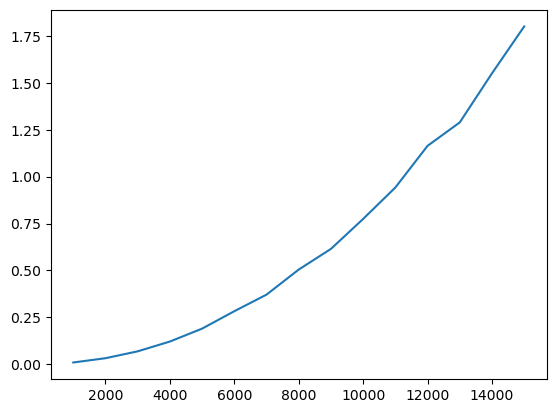

In [45]:
from matplotlib import pyplot as plt
plt.plot(range(1000,15001,1000),times_selection)

#### Ordinamento per fusione

In [49]:
times_merge = []
for i in range(1000, 15001, 1000):
    l = create_random_list(i)
    # La funzione time restituisce il numero di secondi trascorsi dal 1° gennaio 1970.
    start_time = time()
    merge_sort(l)
    end_time = time()
    # La differenza tra end_time e start_time è la quantitià di tempo, in secondi, che è
    # stata impiegata dalla funzione selection_sort.
    times_merge.append(end_time - start_time)
    print(f"Size {i} Merge Sort Time: {end_time - start_time:10.3f} secondi")

Size 1000 Merge Sort Time:      0.001 secondi
Size 2000 Merge Sort Time:      0.001 secondi
Size 3000 Merge Sort Time:      0.003 secondi
Size 4000 Merge Sort Time:      0.005 secondi
Size 5000 Merge Sort Time:      0.004 secondi
Size 6000 Merge Sort Time:      0.005 secondi
Size 7000 Merge Sort Time:      0.006 secondi
Size 8000 Merge Sort Time:      0.007 secondi
Size 9000 Merge Sort Time:      0.008 secondi
Size 10000 Merge Sort Time:      0.009 secondi
Size 11000 Merge Sort Time:      0.009 secondi
Size 12000 Merge Sort Time:      0.011 secondi
Size 13000 Merge Sort Time:      0.011 secondi
Size 14000 Merge Sort Time:      0.012 secondi
Size 15000 Merge Sort Time:      0.013 secondi


Si vede che il merge sort per liste così lunghe è decisamente più veloce del selection sort. Evidentemente il selection sort è più efficiente per liste corte, ma il merge sort è più veloce per liste lunghe.

Notiamo anche che quando raddoppiano la dimensione della lista, il tempo di esecuzione del merge sort raddoppia (o poco più) e non quadruplica. La complessità computazionale del merge sort è infatti $O(n \log n)$, che è poco di più di una funzione linerare $O(n)$.

Graficamente abbiamo:

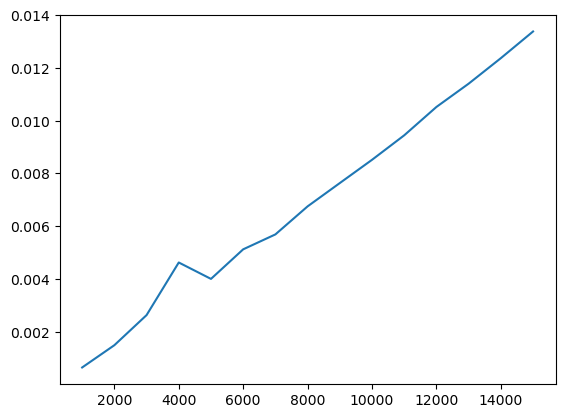

In [50]:
from matplotlib import pyplot as plt
plt.plot(range(1000,15001,1000),times_merge)